In [15]:
# 📌 Cell 1: Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import yfinance as yf

from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf


In [16]:
# 📌 Cell 2: Load Data
TICKERS = ["AAPL", "MSFT", "GOOGL", "AMZN", "META", "TSLA", "NVDA"]

START = "2023-01-01"
END   = "2025-01-01"

data = {}
for t in TICKERS:
    df = yf.download(t, start=START, end=END, auto_adjust=False)
    if not df.empty:
        df["Daily Return"] = df["Adj Close"].pct_change()
        data[t] = df
    else:
        print(f"⚠️ No data for {t}")

multi_df = pd.concat({t: data[t] for t in data.keys()}, axis=1)
multi_df.head()


[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


AAPL                                                  \
Price        Adj Close       Close        High         Low        Open   
Ticker            AAPL        AAPL        AAPL        AAPL        AAPL   
Date                                                                     
2023-01-03  123.330635  125.070000  130.899994  124.169998  130.279999   
2023-01-04  124.602707  126.360001  128.660004  125.080002  126.889999   
2023-01-05  123.281342  125.019997  127.769997  124.760002  127.129997   
2023-01-06  127.817360  129.619995  130.289993  124.889999  126.010002   
2023-01-09  128.339996  130.149994  133.410004  129.889999  130.470001   

                                          MSFT                          ...  \
Price          Volume Daily Return   Adj Close       Close        High  ...   
Ticker           AAPL                     MSFT        MSFT        MSFT  ...   
Date                                                                    ...   
2023-01-03  112117500          NaN  234.423584  239.580002  245.750000  ...   
2023-01-04   89113600     0.010314  224.169144  229.100006  232.869995  ...   
2023-01-05   80962700    -0.010605  217.525299  222.309998  227.550003  ...   
2023-01-06   87754700     0.036794  220.088882  224.929993  225.759995  ...   
2023-01-09   70790800     0.004089  222.231781  227.119995  231.240005  ...   

                  TSLA                               NVDA                  \
Price             Open     Volume Daily Return  Adj Close   Close    High   
Ticker            TSLA       TSLA                    NVDA    NVDA    NVDA   
Date                                                                        
2023-01-03  118.470001  231402800          NaN  14.302284  14.315  14.996   
2023-01-04  109.110001  180389000     0.051249  14.735901  14.749  14.853   
2023-01-05  110.510002  157986300    -0.029039  14.252332  14.265  14.564   
2023-01-06  103.000000  220911100     0.024651  14.845803  14.859  15.010   
2023-01-09  118.959999  190284000     0.059349  15.614120  15.628  16.056   

                                                    
Price          Low    Open     Volume Daily Return  
Ticker        NVDA    NVDA       NVDA               
Date                                                
2023-01-03  14.096  14.851  401277000          NaN  
2023-01-04  14.241  14.567  431324000     0.030318  
2023-01-05  14.148  14.491  389168000    -0.032816  
2023-01-06  14.034  14.474  405044000     0.041640  
2023-01-09  15.141  15.284  504231000     0.051753  

[5 rows x 49 columns]

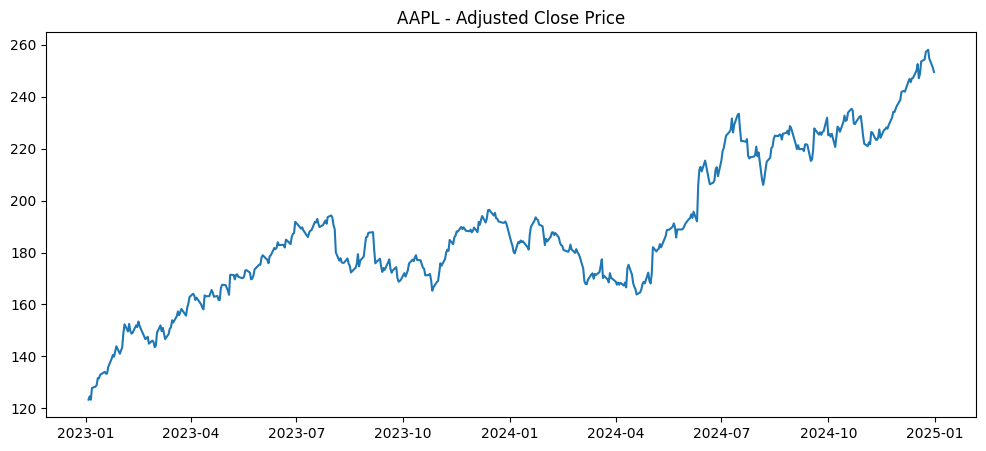

In [17]:
# 📌 Cell 3: เลือกหุ้นที่สนใจ เช่น AAPL
symbol = "AAPL"
series = multi_df[symbol]["Adj Close"].dropna()

plt.figure(figsize=(12,5))
plt.plot(series)
plt.title(f"{symbol} - Adjusted Close Price")
plt.show()


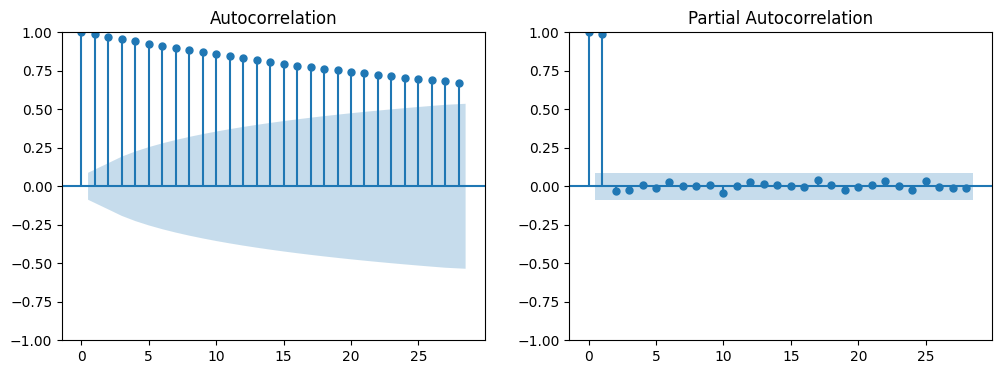

In [18]:
# 📌 Cell 4: ตรวจสอบ ACF/PACF
fig, axes = plt.subplots(1,2, figsize=(12,4))
plot_acf(series.dropna(), ax=axes[0])
plot_pacf(series.dropna(), ax=axes[1])
plt.show()


                               SARIMAX Results                                
Dep. Variable:                   AAPL   No. Observations:                  502
Model:                 ARIMA(2, 1, 0)   Log Likelihood               -1175.623
Date:                Tue, 09 Sep 2025   AIC                           2357.247
Time:                        00:50:56   BIC                           2369.896
Sample:                             0   HQIC                          2362.210
                                - 502                                         
Covariance Type:                  opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0774      0.041      1.898      0.058      -0.003       0.157
ar.L2         -0.0263      0.049     -0.536      0.592      -0.122       0.070
sigma2         6.3931      0.260     24.591      0.0

c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given

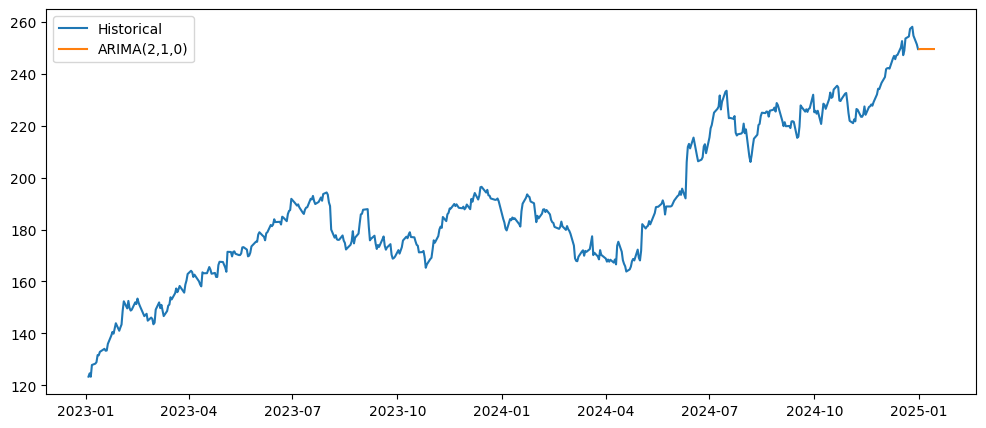

In [19]:
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX

# ใช้ ARIMA(2,1,0)
arima_model = ARIMA(series, order=(2,1,0)).fit()
print(arima_model.summary())

forecast_arima = arima_model.forecast(steps=10)

plt.figure(figsize=(12,5))
plt.plot(series, label="Historical")
plt.plot(pd.date_range(series.index[-1], periods=11, freq="B")[1:], forecast_arima, label="ARIMA(2,1,0)")
plt.legend()
plt.show()


c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)


                                     SARIMAX Results                                      
Dep. Variable:                               AAPL   No. Observations:                  502
Model:             SARIMAX(2, 1, 0)x(1, 1, 0, 12)   Log Likelihood               -1254.796
Date:                            Tue, 09 Sep 2025   AIC                           2517.592
Time:                                    00:50:56   BIC                           2534.361
Sample:                                         0   HQIC                          2524.178
                                            - 502                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.0755      0.040      1.897      0.058      -0.003       0.154
ar.L2         -0.0651      0.046   

c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given with an integer index beginning at `start`.
  return get_prediction_index(
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: FutureWarning: No supported index is available. In the next version, calling this method in a model without a supported index will result in an exception.
  return get_prediction_index(


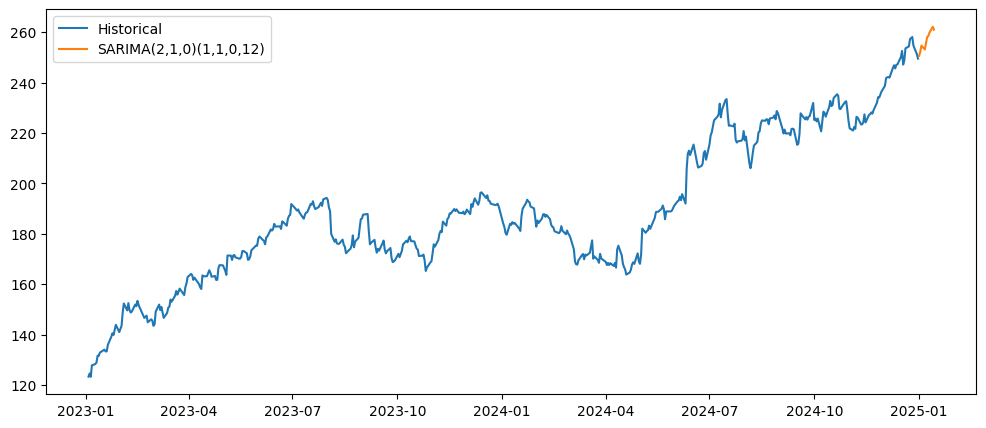

In [20]:
# ใช้ SARIMA(2,1,0)(1,1,0,12)
sarima_model = SARIMAX(series, order=(2,1,0), seasonal_order=(1,1,0,12)).fit()
print(sarima_model.summary())

forecast_sarima = sarima_model.forecast(steps=10)

plt.figure(figsize=(12,5))
plt.plot(series, label="Historical")
plt.plot(pd.date_range(series.index[-1], periods=11, freq="B")[1:], forecast_sarima, label="SARIMA(2,1,0)(1,1,0,12)")
plt.legend()
plt.show()


c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given

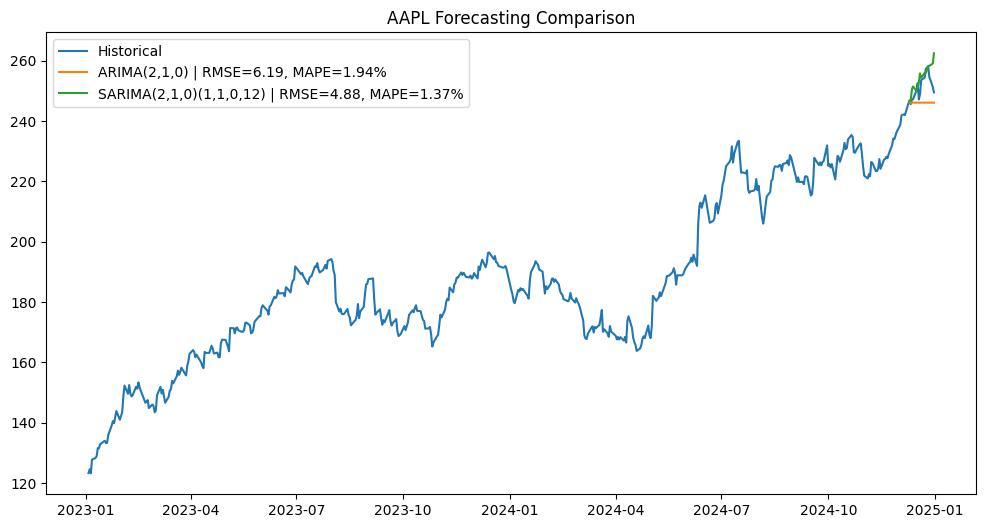

{'Symbol': 'AAPL', 'ARIMA_RMSE': np.float64(6.1912871758327785), 'ARIMA_MAPE': 1.937694374109344, 'SARIMA_RMSE': np.float64(4.8839353331890205), 'SARIMA_MAPE': 1.36549616088498}


In [21]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.arima.model import ARIMA
from statsmodels.tsa.statespace.sarimax import SARIMAX
from sklearn.metrics import mean_squared_error, mean_absolute_percentage_error

# ฟังก์ชันเปรียบเทียบ ARIMA vs SARIMA
def compare_arima_sarima(symbol, steps=15):
    series = multi_df[symbol]["Adj Close"].dropna()

    # แบ่ง Train/Test (ทดสอบ steps วันสุดท้าย)
    train, test = series[:-steps], series[-steps:]

    # ========== ARIMA ==========
    arima_model = ARIMA(train, order=(2,1,0)).fit()
    arima_forecast = arima_model.forecast(steps=steps)

    rmse_arima = np.sqrt(mean_squared_error(test, arima_forecast))
    mape_arima = mean_absolute_percentage_error(test, arima_forecast) * 100

    # ========== SARIMA ==========
    sarima_model = SARIMAX(train, order=(2,1,0), seasonal_order=(1,1,0,12)).fit()
    sarima_forecast = sarima_model.forecast(steps=steps)

    rmse_sarima = np.sqrt(mean_squared_error(test, sarima_forecast))
    mape_sarima = mean_absolute_percentage_error(test, sarima_forecast) * 100

    # ========== Plot ==========
    plt.figure(figsize=(12,6))
    plt.plot(series, label="Historical")
    plt.plot(test.index, arima_forecast, label=f"ARIMA(2,1,0) | RMSE={rmse_arima:.2f}, MAPE={mape_arima:.2f}%")
    plt.plot(test.index, sarima_forecast, label=f"SARIMA(2,1,0)(1,1,0,12) | RMSE={rmse_sarima:.2f}, MAPE={mape_sarima:.2f}%")
    plt.title(f"{symbol} Forecasting Comparison")
    plt.legend()
    plt.show()

    return {
        "Symbol": symbol,
        "ARIMA_RMSE": rmse_arima, "ARIMA_MAPE": mape_arima,
        "SARIMA_RMSE": rmse_sarima, "SARIMA_MAPE": mape_sarima
    }

# ตัวอย่างใช้กับ AAPL
results = compare_arima_sarima("AAPL", steps=15)
print(results)


c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given

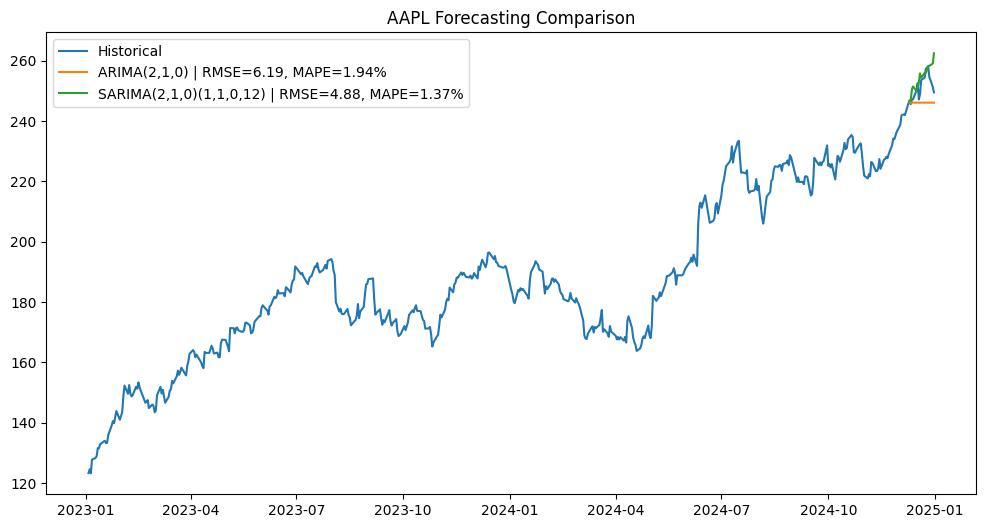

c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given

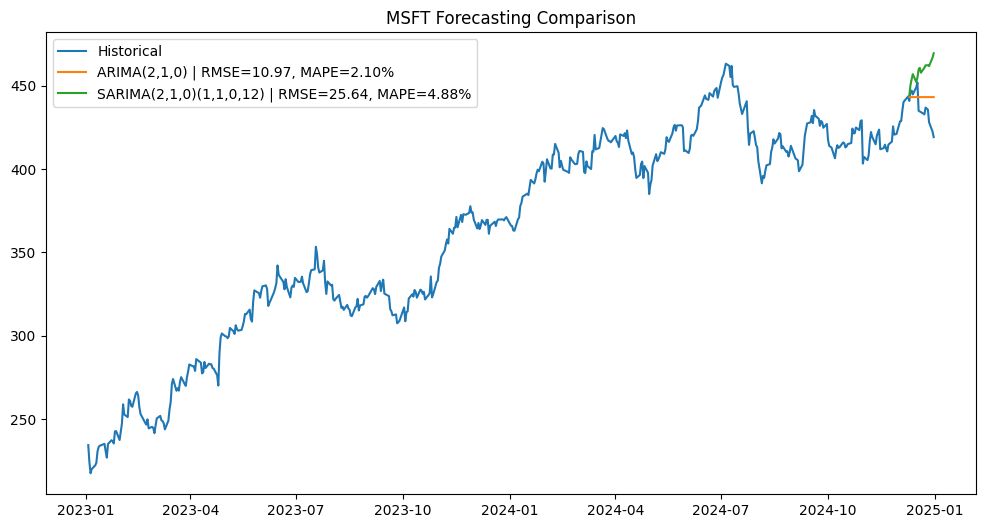

c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given

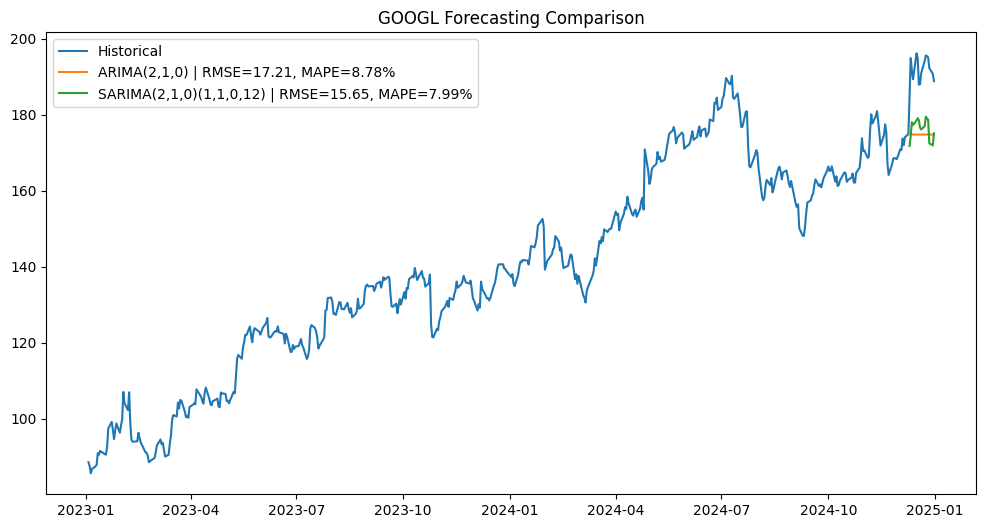

c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given

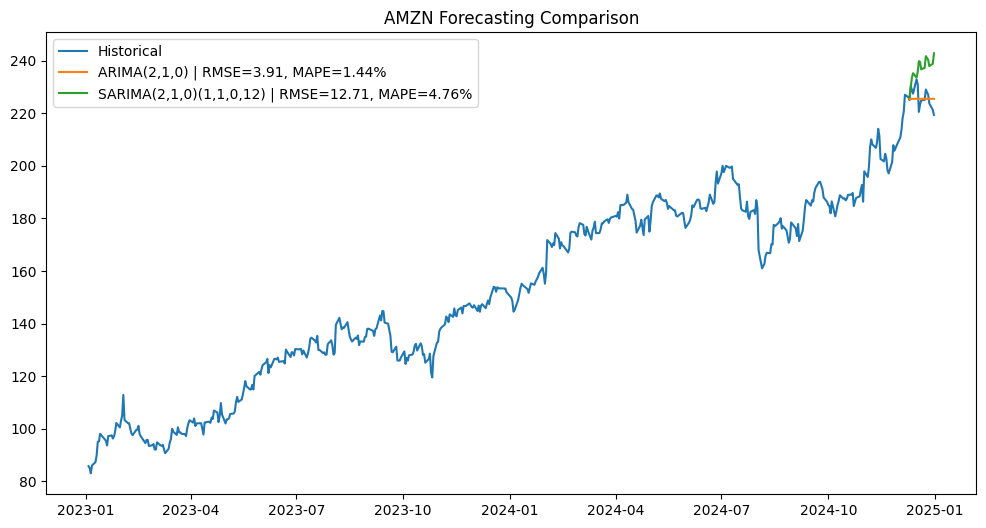

c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given

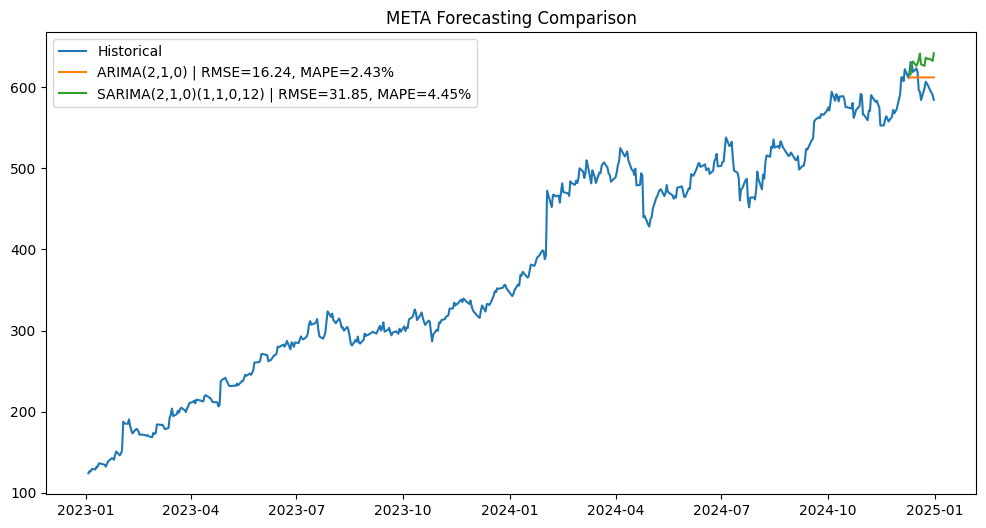

c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given

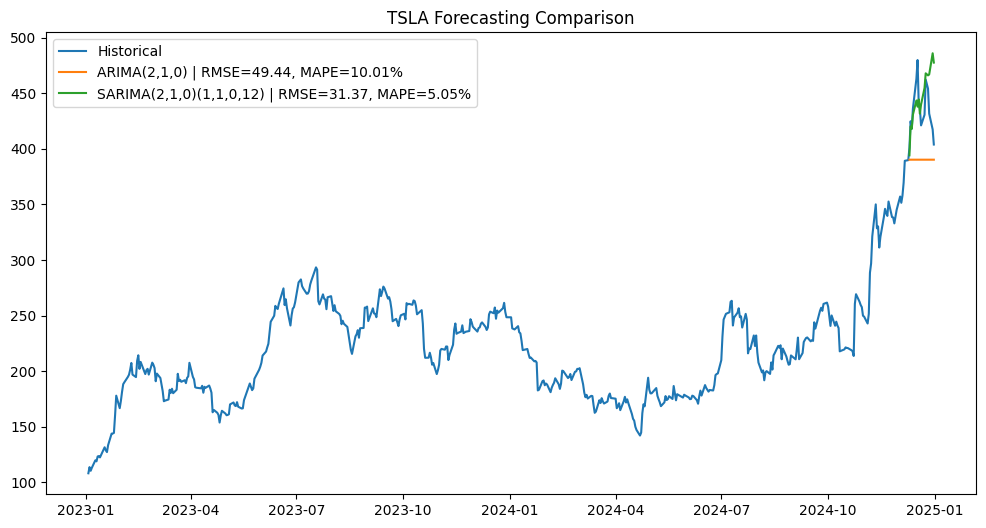

c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:473: ValueWarning: A date index has been provided, but it has no associated frequency information and so will be ignored when e.g. forecasting.
  self._init_dates(dates, freq)
c:\Users\HP\forecast-magnificent-seven\.venv\lib\site-packages\statsmodels\tsa\base\tsa_model.py:837: ValueWarning: No supported index is available. Prediction results will be given

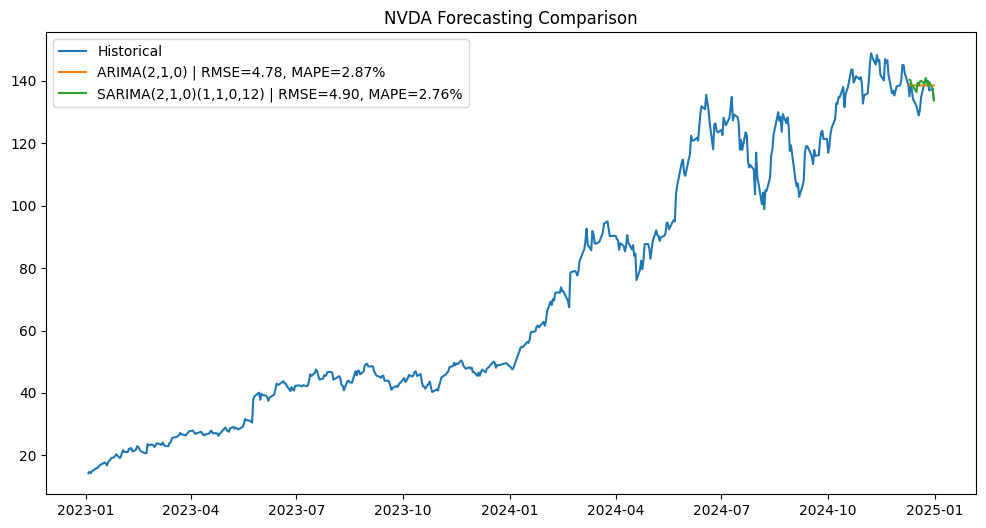

  Symbol  ARIMA_RMSE  ARIMA_MAPE  SARIMA_RMSE  SARIMA_MAPE
0   AAPL    6.191287    1.937694     4.883935     1.365496
1   MSFT   10.968497    2.096279    25.636493     4.875992
2  GOOGL   17.214163    8.781869    15.651089     7.985052
3   AMZN    3.912897    1.441147    12.707148     4.755977
4   META   16.238883    2.427445    31.846756     4.452111
5   TSLA   49.438098   10.014636    31.366695     5.050314
6   NVDA    4.775703    2.873495     4.903319     2.759144


In [22]:
all_results = []

for t in TICKERS:
    try:
        res = compare_arima_sarima(t, steps=15)
        all_results.append(res)
    except Exception as e:
        print(f"❌ Error with {t}: {e}")

df_results = pd.DataFrame(all_results)
print(df_results)
